# With the money I have, which is the best district to invest on? 

You have 10 points to distribute across three variables. Please provide more points to what you give more importance when doing an investment.

- **PER** number of years to get the return of investment.
- **RB** Anual rental return.
- **revaluation** Increase in property value. The apartment price after the PER years therefore the original investment is recovered.

## Code

In [51]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option('display.float_format', '{:.3f}'.format)


def calculate_investment_score(data, input_money, weight_revaluation, weight_rent_anual, weight_per):    
    try:
        data['loan'] = data['sell'].apply(lambda x: x - float(input_money)) # keep just the ones with 0 or positive loan
        filtered = data[data['loan'] > 0].copy()
        filtered['normalized_loan'] = scaler.fit_transform(1 / filtered[['loan']])
        filtered['score'] = (
                            float(weight_rent_anual)/10 * filtered['norm_RB'] 
                             + float(weight_revaluation)/10 * filtered['norm_revaluation'] 
                             + float(weight_per)/10 * filtered['norm_PER']
                            )
        cols = ['distrito', 'size_rent', 'size_sell', 'mean_meters', 'rent', 'sell', 'RB', 'PER', 'score', 'revaluation', 'loan', 'advertised_rent', 'advertised_sell']
        filtered = filtered[cols]
        filtered = filtered.sort_values(by=['loan'])
    except Exception:
        print('Please enter valid numbers')
    return filtered


data = pd.read_csv('../data/info_per_district_and_meters.csv')

## Input

In [79]:
input_money = input('Enter the money you want to invest:')

weight_revaluation = input('How many points do you give to revaluation?')
weight_rent_anual = input('How many points do you give to RB (Anual rental return)?')
weight_per = input('How many points do you give to PER?')

top = input('Number of columns you want to plot')

result = calculate_investment_score(data, input_money, weight_revaluation, weight_rent_anual, weight_per)
result.head(int(top))

Enter the money you want to invest: 50000
How many points do you give to revaluation? 4
How many points do you give to RB (Anual rental return)? 5
How many points do you give to PER? 1
Number of columns you want to plot 20


distrito  size_rent  size_sell  mean_meters     rent  \
83                  el-escorial      1.000      1.000       30.000  428.571   
153                       parla      0.000      1.000       30.000    0.000   
101                      getafe      1.000      2.000       30.000  528.000   
0             alcala-de-henares      0.000      2.000       30.000    0.000   
168          puente-de-vallecas     15.000     59.000       30.000  992.682   
45                  carabanchel     23.000     21.000       30.000 1141.744   
252        villaviciosa-de-odon      9.000      3.000       50.000 1167.130   
70             collado-villalba      2.000      2.000       30.000  628.378   
10                     alcorcon      0.000      2.000       30.000    0.000   
246                  villaverde      8.000      2.000       30.000  825.626   
247                  villaverde     42.000     73.000       50.000  949.715   
154                       parla      2.000     11.000       50.000  845.152   
5                    alcobendas     10.000      3.000       30.000 1037.386   
124                     leganes      3.000      5.000       30.000  787.406   
144                    mostoles      2.000      2.000       30.000  765.000   
119                      latina     27.000      6.000       30.000  964.239   
189  san-lorenzo-de-el-escorial      2.000      7.000       50.000  800.980   
159                       pinto      5.000      4.000       50.000  853.929   
16                     aranjuez     10.000     18.000       50.000  681.704   
145                    mostoles      3.000     10.000       50.000  853.460   

          sell     RB    PER  score  revaluation      loan  advertised_rent  \
83   68571.429  7.500 13.333  0.334  1107483.550 18571.429            1.000   
153  72729.730  0.000  0.000  0.000    72729.730 22729.730            0.000   
101  78025.210  8.120 12.315  0.362   687094.184 28025.210            1.533   
0    94928.571  0.000  0.000  0.000    94928.571 44928.571            0.000   
168  98549.747 12.087  8.273  0.539   648693.863 48549.747            1.295   
45  102666.990 13.345  7.493  0.595   589407.856 52666.990            1.565   
252 104000.000 13.467  7.426  0.600   286837.525 54000.000            1.532   
70  113850.357  6.623 15.098  0.295  1761333.462 63850.357            1.417   
10  115384.615  0.000  0.000  0.000   115384.615 65384.615            0.000   
246 120357.143  8.232 12.148  0.367  1221041.621 70357.143            1.443   
247 121636.791  9.369 10.673  0.417   931423.343 71636.791            1.499   
154 123583.408  8.206 12.186  0.366   812658.966 73583.408            1.022   
5   123994.253 10.040  9.960  0.447   443413.146 73994.253            1.149   
124 124617.438  7.582 13.189  0.338   890135.251 74617.438            1.622   
144 129517.582  7.088 14.109  0.316  1484275.262 79517.582            1.267   
119 130987.010  8.834 11.320  0.394  1491935.387 80987.010            1.445   
189 131172.421  7.328 13.647  0.327  1660539.882 81172.421            1.783   
159 131947.552  7.766 12.877  0.346   390841.772 81947.552            1.553   
16  133480.927  6.129 16.317  0.273  1619193.664 83480.927            1.130   
145 134713.719  7.602 13.154  0.339  1308889.701 84713.719            1.744   

     advertised_sell  
83             2.000  
153            2.000  
101            1.510  
0              1.217  
168            2.012  
45             2.276  
252            4.000  
70             1.033  
10             1.567  
246            1.500  
247            1.829  
154            2.113  
5              4.318  
124            1.600  
144            1.683  
119            1.911  
189            1.817  
159            4.150  
16             1.597  
145            2.990

### Some plot functions

In [55]:
# Code

def plot_aux(aux, _type, title, log=False, height=800):
    fig = px.bar(aux, x="distrito", y=_type, color="mean_meters", color_continuous_scale='blues')
    layout_dict = {
        'width': 1100,
        'height': height,
        'xaxis': dict(categoryorder='total descending'),
        'yaxis': dict(title="Percentage", type='log') if log else None,
        'title': title,
        'legend_title_text': None,
        'barmode': 'group',
        'template': 'plotly_white'
    }
    fig.update_layout(**layout_dict)
    fig.show()

def plt_scatter(aux, x, y, title, xlabel=None, ylabel=None):
    fig = px.scatter(aux, x=x, y=y, color='distrito')
    layout_dict= {
        'template': 'plotly_white', 
        'title': title, 
        'xaxis_title': xlabel, 
        'yaxis_title': ylabel
    }
    fig.update_layout(**layout_dict)
    fig.show()

## Average square meters per district

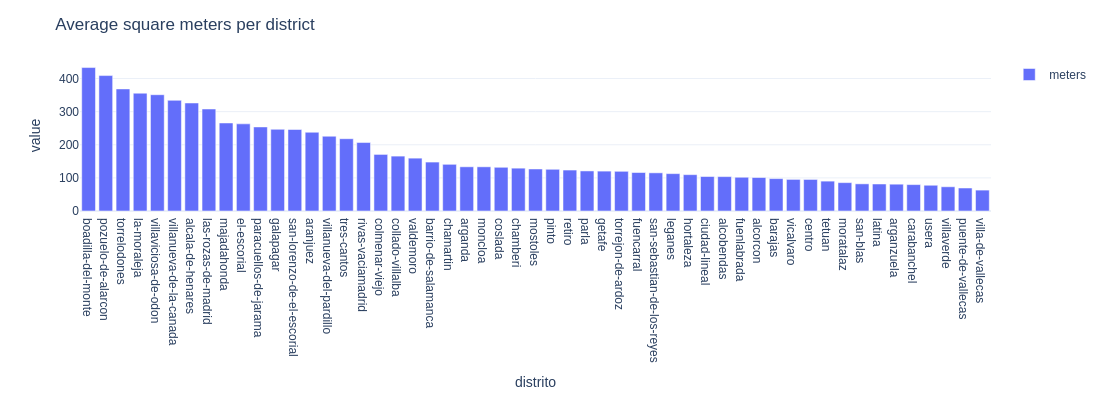

In [15]:
average_meters = df.groupby('distrito')['meters'].mean()
fig = px.bar(average_meters, color_continuous_scale=['blues'])
fig.update_layout(
    width=1100, 
    height=400,
    title="Average square meters per district",
    xaxis={'categoryorder': 'total descending'}, 
    legend_title_text=None,
    template='plotly_white')
fig.show()

## Percentage of selling/renting apartments per district

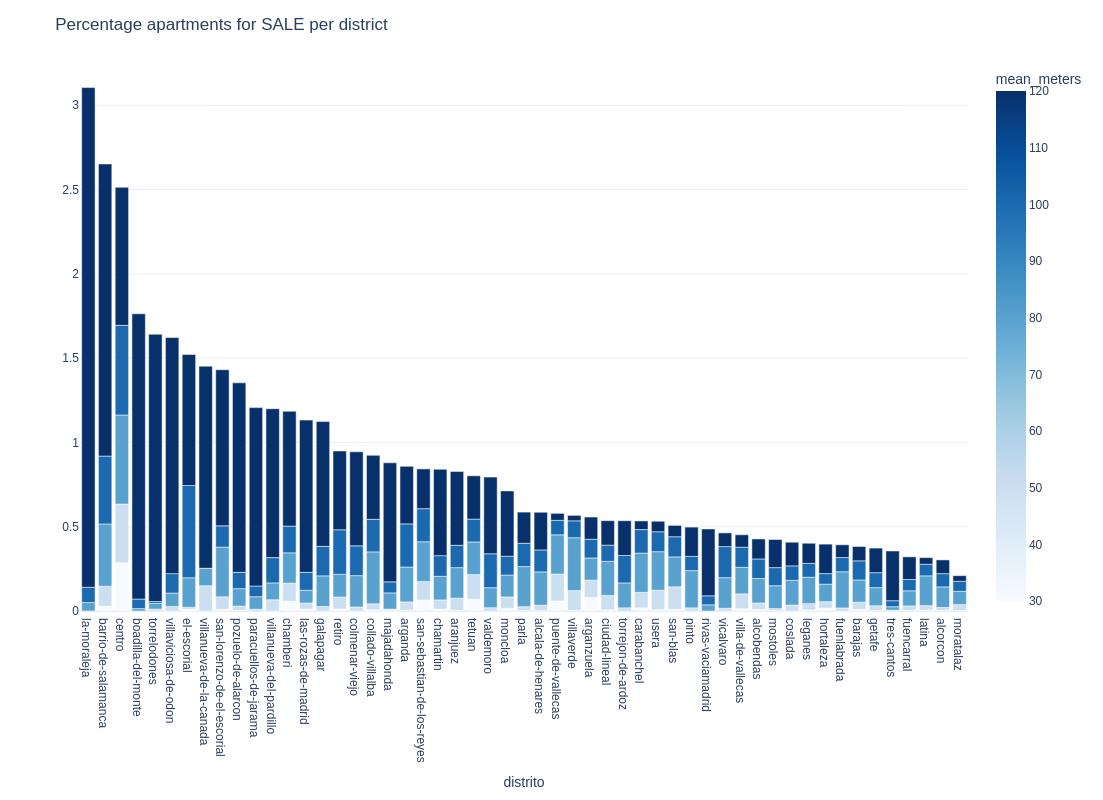

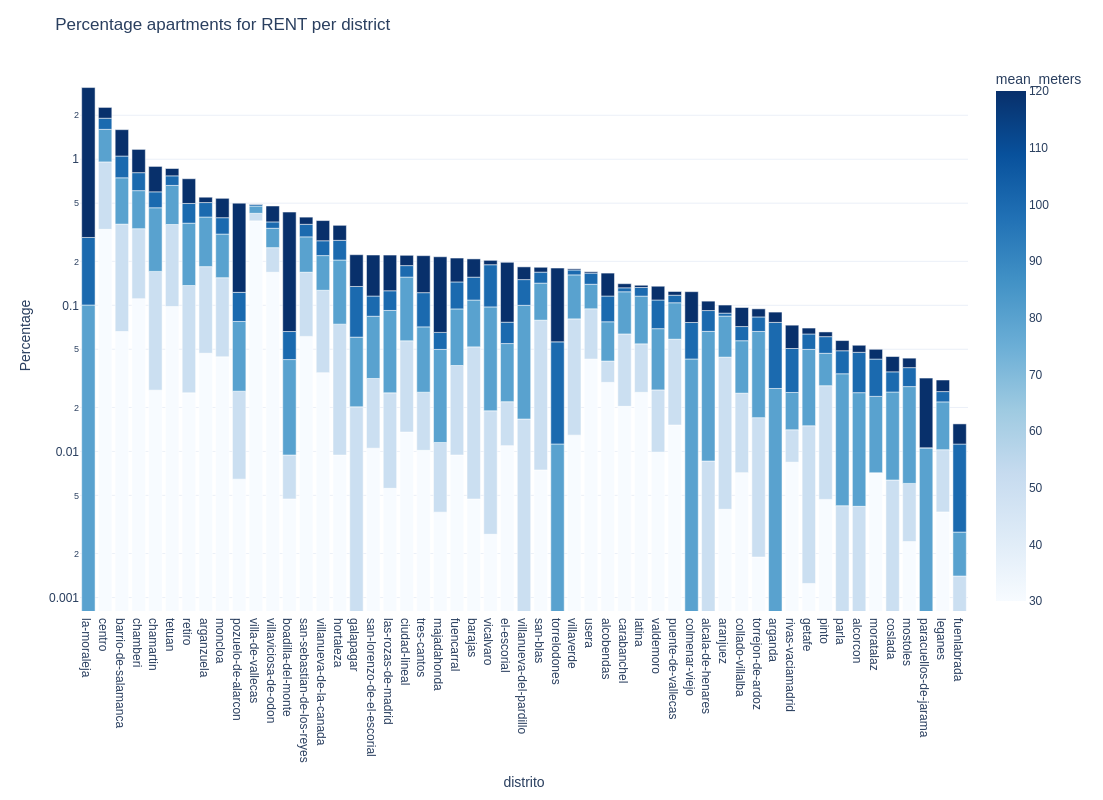

In [43]:
aux = data[['distrito', 'mean_meters', 'number_flats', 'size_sell', 'size_rent']].copy()

aux.loc[:, '%sell'] = (aux['size_sell'] / aux['number_flats']) * 100
aux.loc[:, '%rent'] = (aux['size_rent'] / aux['number_flats']) * 100

title = 'Percentage apartments for SALE per district'
plot_aux(aux, "%sell", title=title)
title = 'Percentage apartments for RENT per district'
plot_aux(aux, "%rent", title=title, log=True)

## Average price per square meter (€/m²)

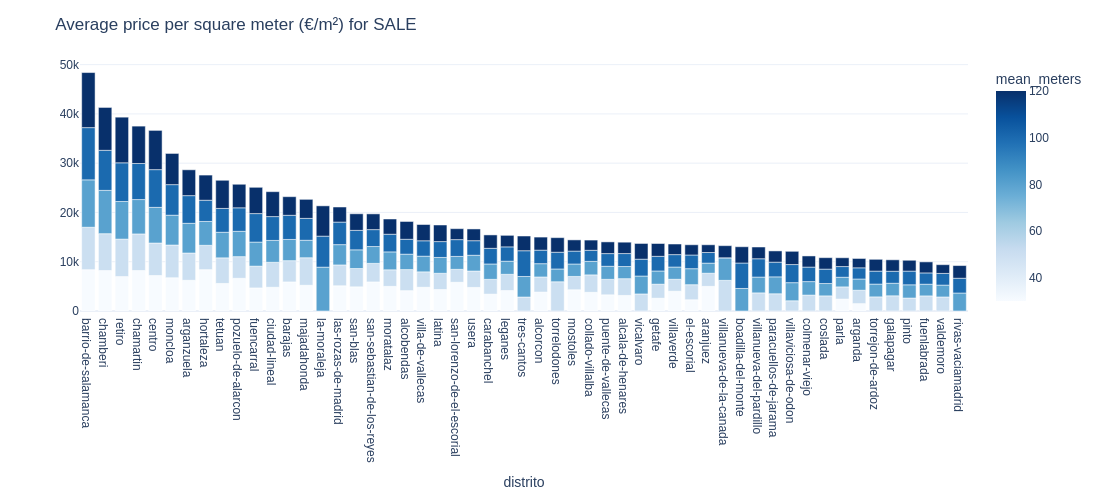

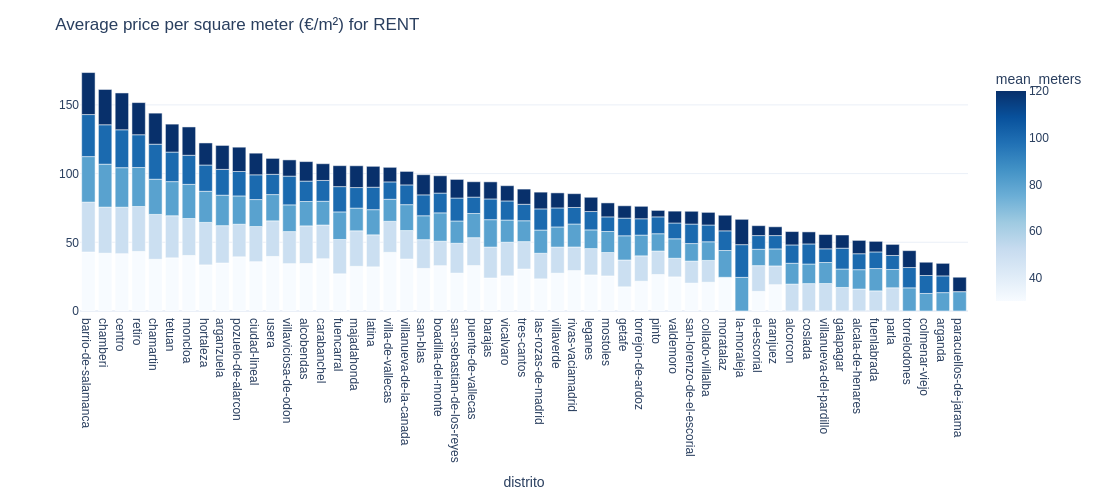

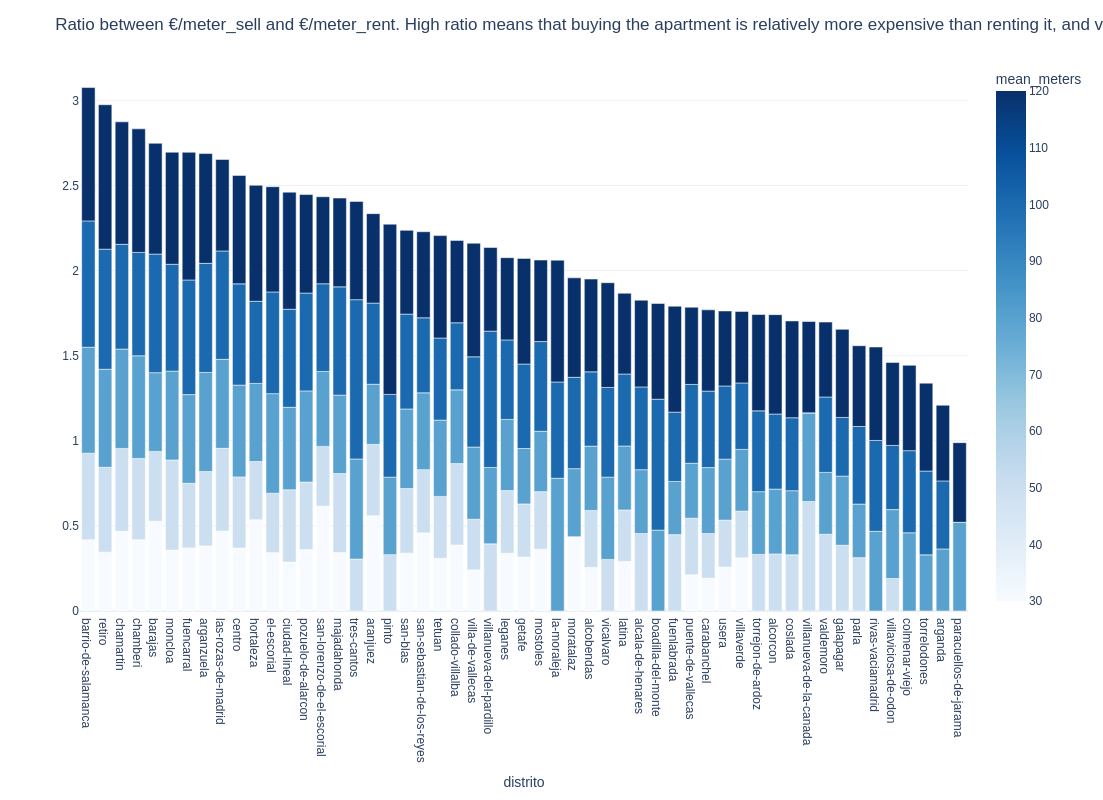

In [44]:
aux = data[['distrito', 'mean_meters', 'number_flats', '€/meter_rent', '€/meter_sell']].copy()

title = 'Average price per square meter (€/m²) for SALE'
plot_aux(aux, "€/meter_sell", title=title, height=500)

title = 'Average price per square meter (€/m²) for RENT'
plot_aux(aux, "€/meter_rent", title=title, height=500)


def calculate_ratio(x):
    return x['€/meter_sell'] / x['€/meter_rent'] if x['€/meter_rent'] > 0 else 0
aux['ratio'] = aux.apply(calculate_ratio, axis=1)
aux['norm_ratio'] = (aux['ratio'] - aux['ratio'].min()) / (aux['ratio'].max() - aux['ratio'].min())

title = 'Ratio between €/meter_sell and €/meter_rent. High ratio means that buying the apartment is relatively more expensive than renting it, and viceversa'
plot_aux(aux, 'norm_ratio', title=title)

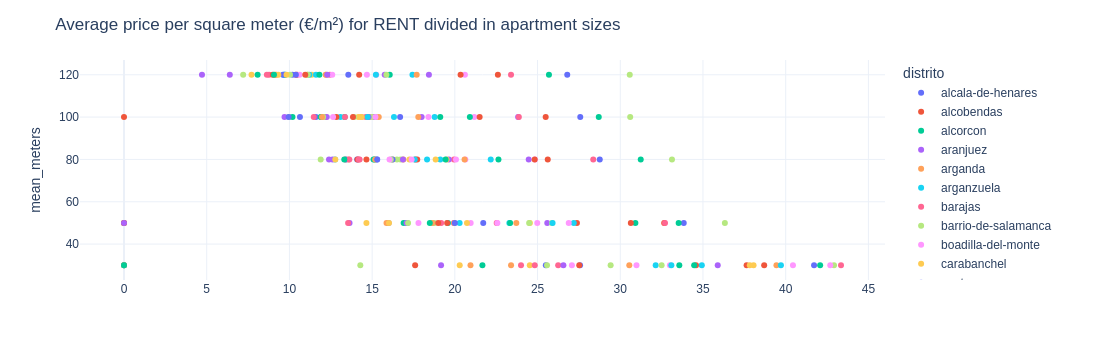

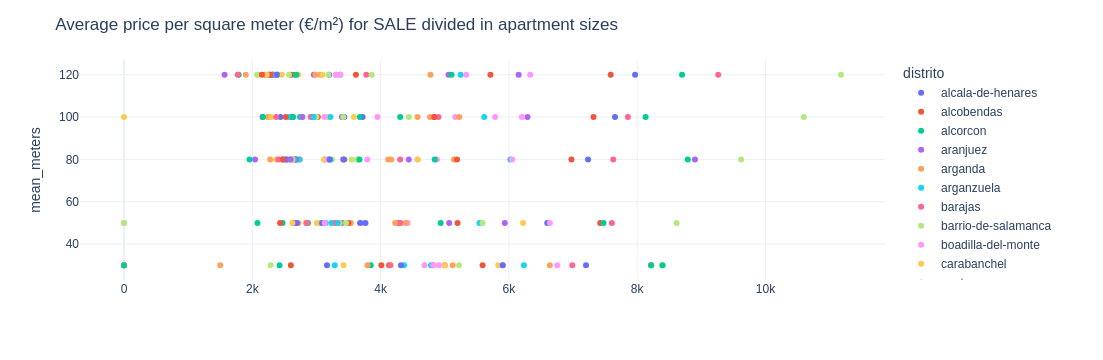

In [47]:
title = 'Average price per square meter (€/m²) for RENT divided in apartment sizes'
plt_scatter(data, x='€/meter_rent', y='mean_meters', title=title)
title = 'Average price per square meter (€/m²) for SALE divided in apartment sizes'
plt_scatter(data, x='€/meter_sell', y='mean_meters', title=title)

### Correlation between price and meters

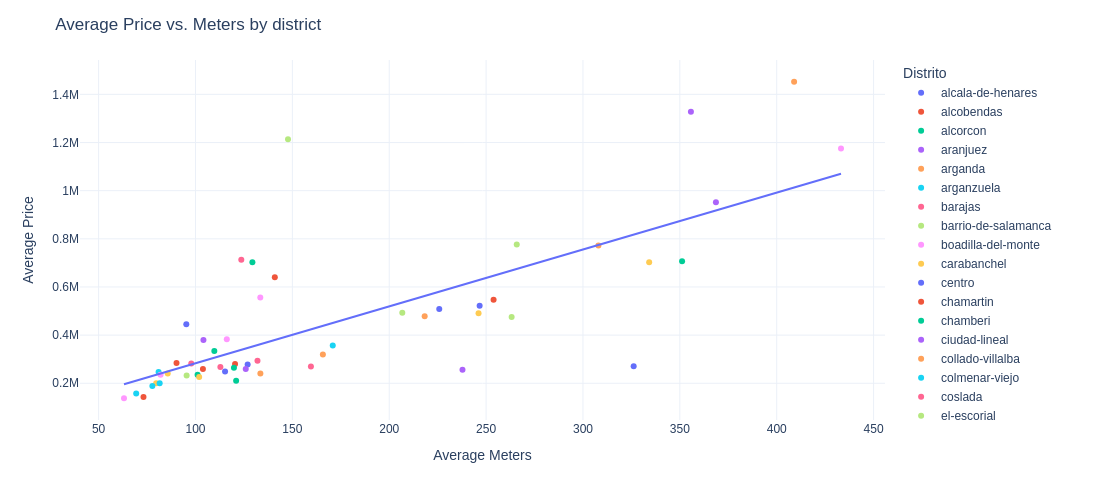

In [11]:
grouped = df.groupby('distrito').agg({'price': 'mean', 'meters': 'mean'}).reset_index()

slope, intercept = np.polyfit(grouped['meters'], grouped['price'], 1)
trend_x = np.linspace(grouped['meters'].min(), grouped['meters'].max(), 100)
trend_y = slope * trend_x + intercept

fig = px.scatter(grouped, x='meters', y='price', color='distrito')
fig.add_traces(px.line(x=trend_x, y=trend_y).data)
fig.update_layout(
    width=1000, 
    height=500,
    title='Average Price vs. Meters by district',
    xaxis_title='Average Meters',
    yaxis_title='Average Price',
    legend_title='Distrito',
    template='plotly_white'
)

## Average advertisement time

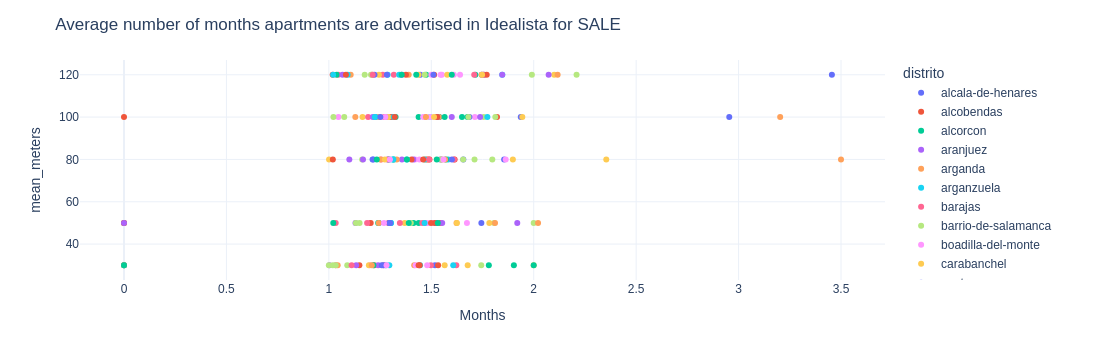

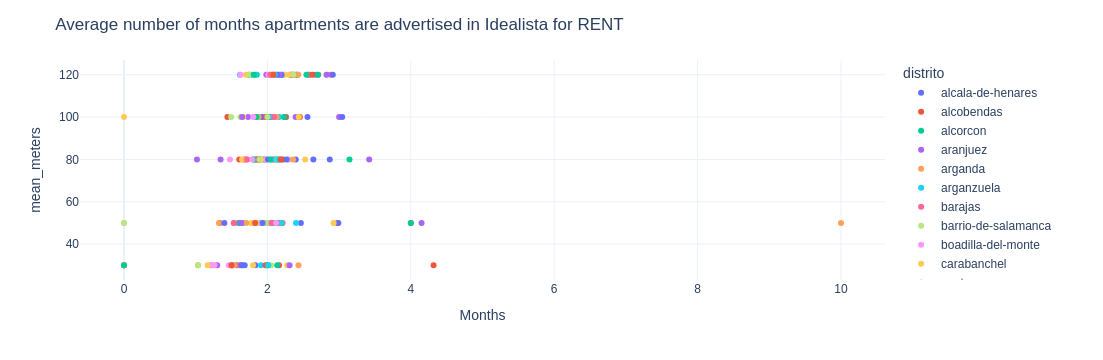

In [34]:
aux = data[['distrito', 'mean_meters', 'advertised_rent', 'advertised_sell']].copy()

aux['advertised_rent'] = aux['advertised_rent'].apply(lambda x: x / (60*24*30)) # Transform from minutes to months
aux['advertised_sell'] = aux['advertised_sell'].apply(lambda x: x / (60*24*30)) # Transform from minutes to months

title = 'Average number of months apartments are advertised in Idealista for SALE'
plt_scatter(aux, x='advertised_rent', y='mean_meters', title=title, xlabel='Months')
title = 'Average number of months apartments are advertised in Idealista for RENT'
plt_scatter(aux, x='advertised_sell', y='mean_meters', title=title, xlabel='Months')

### PER, PER adjusted and gross rental yield

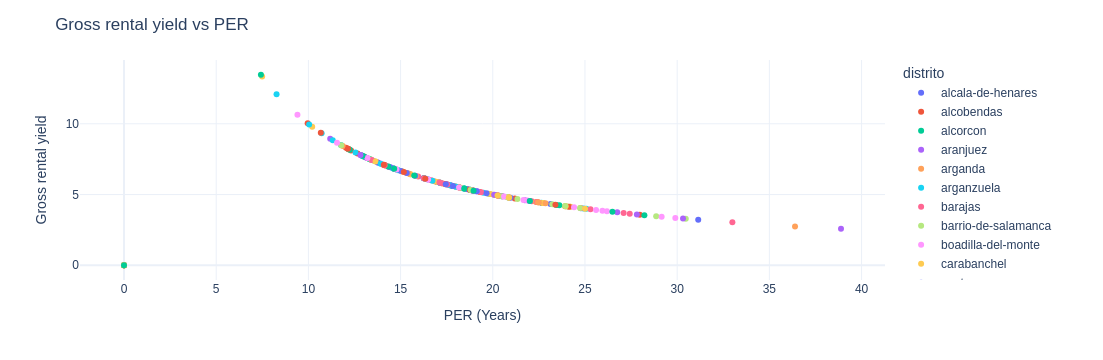

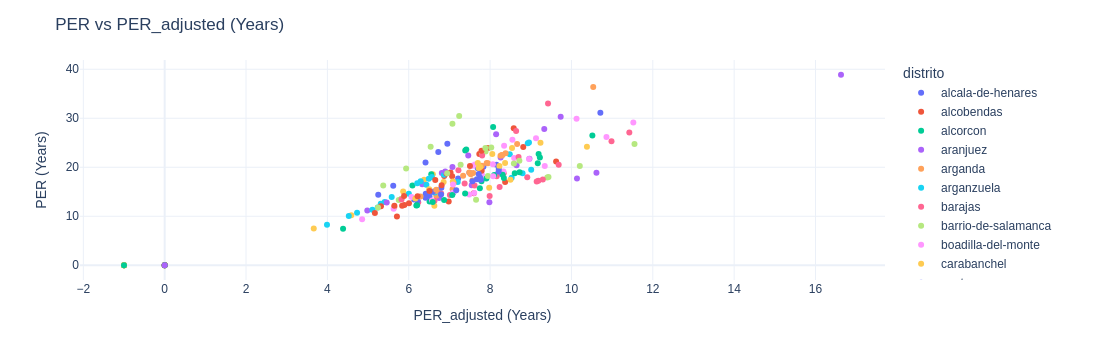

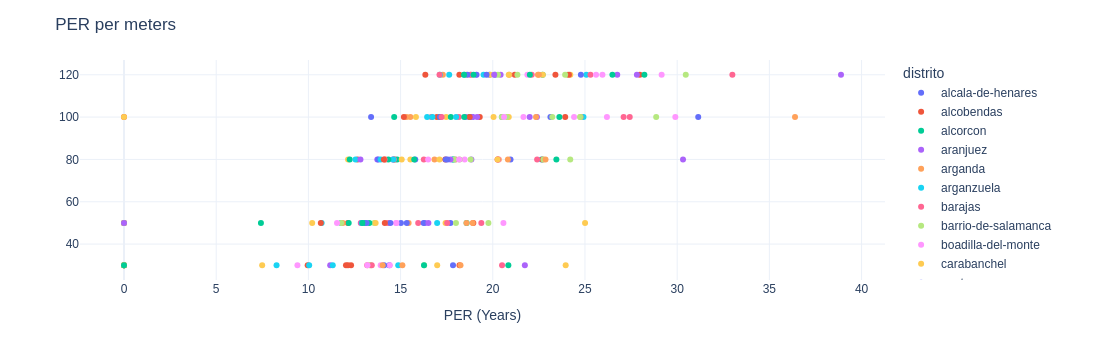

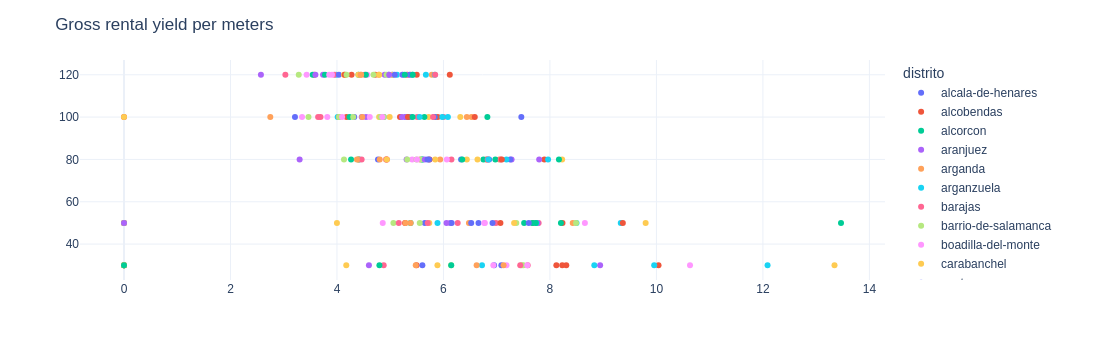

In [61]:
aux = data[['distrito', 'RB', 'PER', 'PER_adjusted', 'mean_meters']].copy()
title = 'Gross rental yield vs PER'
plt_scatter(aux, x='PER', y='RB', title=title, xlabel='PER (Years)', ylabel='Gross rental yield')

title = 'PER vs PER_adjusted (Years)'
plt_scatter(aux, x='PER_adjusted', y='PER', title=title, xlabel='PER_adjusted (Years)', ylabel='PER (Years)')

plt_scatter(aux, x='PER', y='mean_meters', title='PER per meters', xlabel='PER (Years)')
plt_scatter(aux, x='RB', y='mean_meters', title='Gross rental yield per meters', xlabel='')

## Compare change selling/renting rate 2014-2024

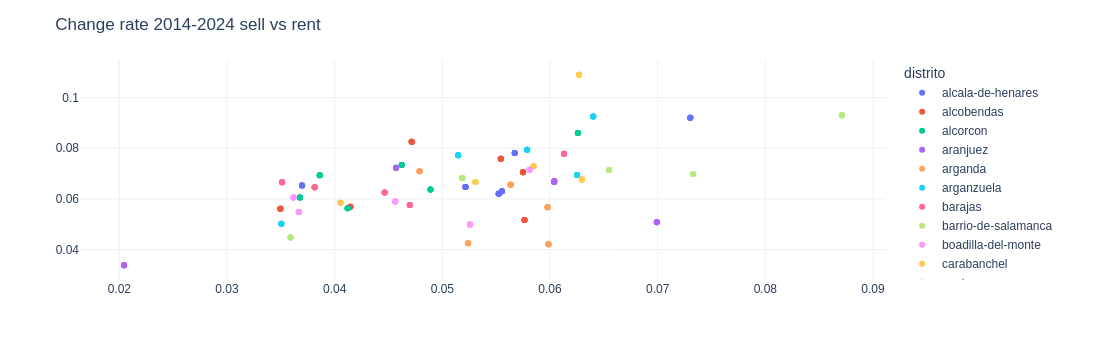

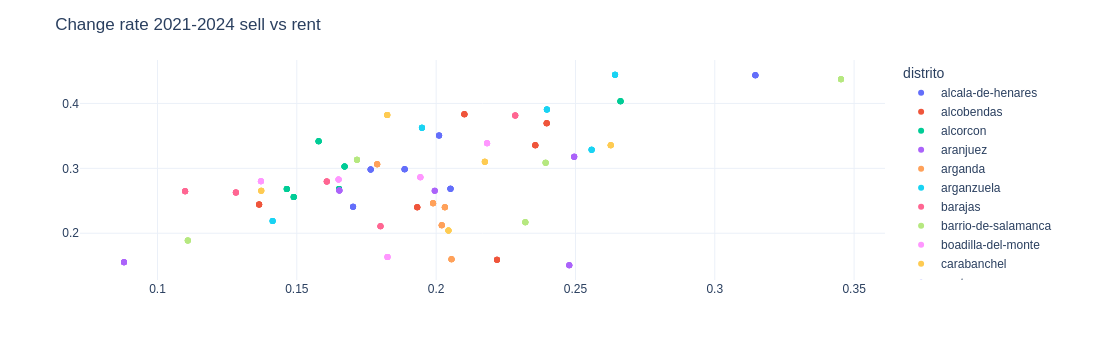

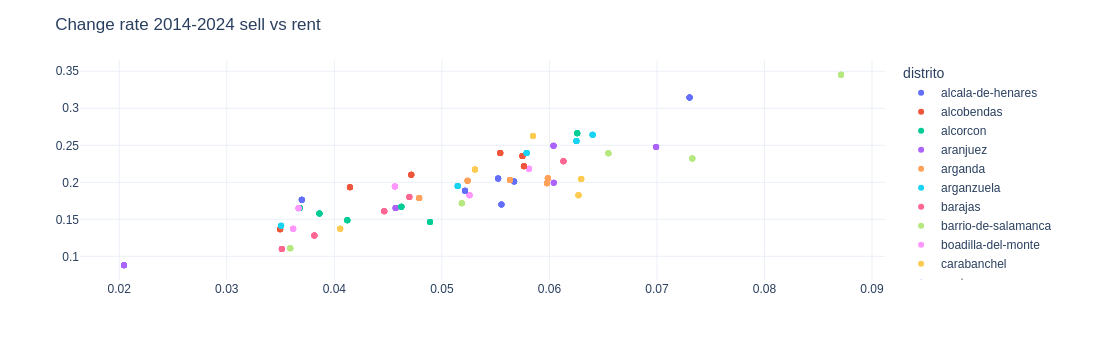

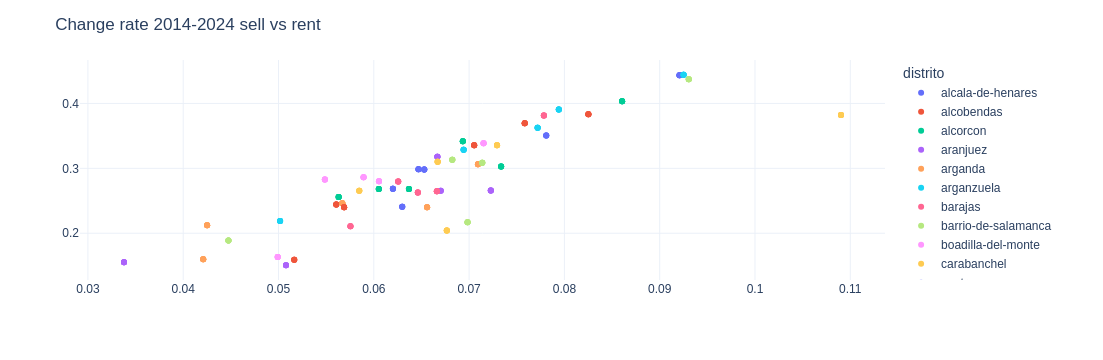

In [69]:
aux = data[['distrito', 'mean_meters', 'change_2014_2024_sell', 'change_2014_2024_rent', 'change_2021_2024_sell', 'change_2021_2024_rent']].copy()
plt_scatter(aux, x='change_2014_2024_sell', y='change_2014_2024_rent', title='Change rate 2014-2024 sell vs rent')
plt_scatter(aux, x='change_2021_2024_sell', y='change_2021_2024_rent', title='Change rate 2021-2024 sell vs rent')
plt_scatter(aux, x='change_2014_2024_sell', y='change_2021_2024_sell', title='Change rate 2014-2024 sell vs rent')
plt_scatter(aux, x='change_2014_2024_rent', y='change_2021_2024_rent', title='Change rate 2014-2024 sell vs rent')

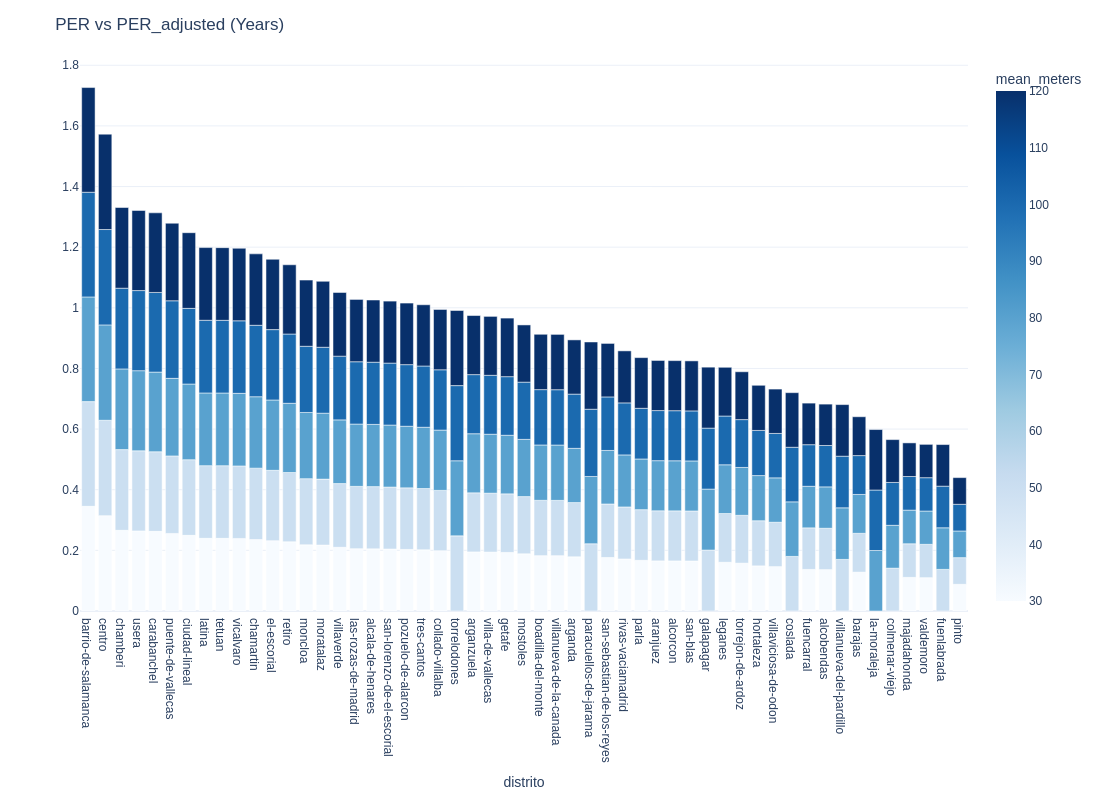

In [70]:
#plot_aux(aux, 'change_2021_2024_sell', title=title)

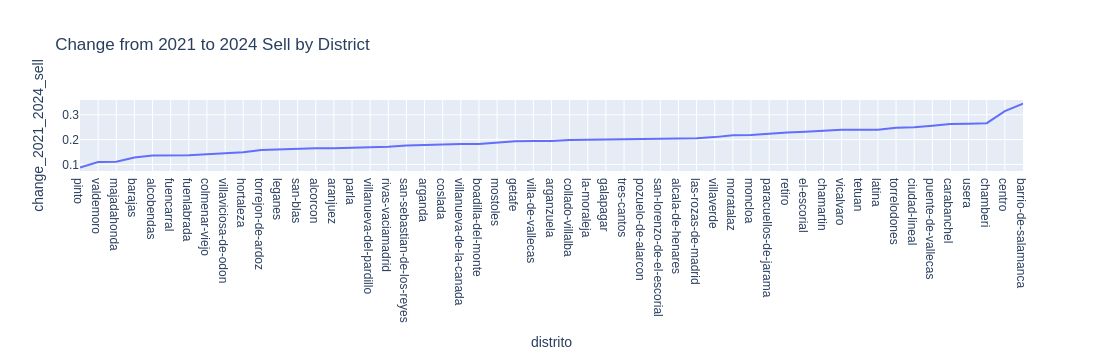

In [87]:
sorted_aux = aux.sort_values('change_2021_2024_sell')

fig = px.line(sorted_aux, x='distrito', y='change_2021_2024_sell',
              title='Change from 2021 to 2024 Sell by District')
fig.update_layout(
    height=400
)
fig.show()

In [ ]:
cols = ['href', 'distrito','price', 'meters', 'hab', 'floor', 'published', 'state']
df = df[cols]

fig, ax = plt.subplots(figsize=(17, 5))
grouped = df.groupby(['distrito', 'state']).size().unstack(fill_value=0).reset_index()
grouped['number_flats'] = grouped['distrito'].apply(lambda x: int(number_flats[x]))
grouped['% alquiler'] = (grouped['alquiler'] / grouped['number_flats']) * 100
grouped['% venta'] = (grouped['venta'] / grouped['number_flats']) * 100

grouped[['distrito', '% alquiler', '% venta']].plot(kind='bar', ax=ax, width=0.8)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.set_ylabel('%')
ax.set_xticklabels(grouped['distrito'])
plt.title('Number of flats to sell/rent in each district, compared to the total number of flats en each district')
plt.show()

df['price'] = df['price'].str.replace('.', '').str.replace('€', '').str.replace('/mes', '').astype(float)
average_price = df.groupby('distrito')['price'].mean()
fig, ax = plt.subplots(figsize=(17, 5))
average_price.plot(kind='bar', stacked=True, ax=ax)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.set_ylabel('€')
plt.title('Average sell price per district')
plt.show()

df['meters'] = df['meters'].str.replace('m²', '').str.replace('.', '').astype(float)
average_meters = df.groupby('distrito')['meters'].mean()
fig, ax = plt.subplots(figsize=(17, 5))
average_meters.plot(kind='bar', stacked=True, ax=ax)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.set_ylabel('m^2')
plt.title('Average square meters per district')
plt.show()

0.7503750582443206 correlation between price and meters


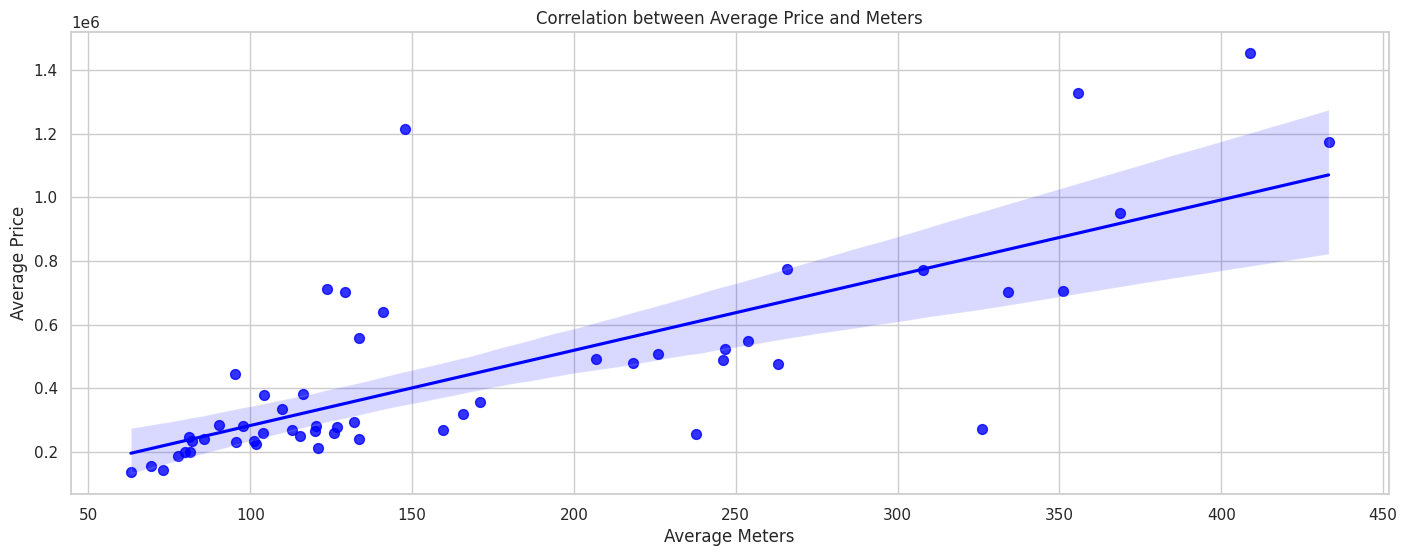

In [13]:
grouped = df.groupby('distrito').agg({'price': 'mean', 'meters': 'mean'})
correlation = grouped['price'].corr(grouped['meters'])
print(correlation, 'correlation between price and meters')

sns.set(style='whitegrid')
plt.figure(figsize=(17, 6))
sns.regplot(data=grouped, x='meters', y='price', scatter_kws={'s': 50}, color='blue')

plt.title('Correlation between Average Price and Meters')
plt.xlabel('Average Meters')
plt.ylabel('Average Price')
plt.show()

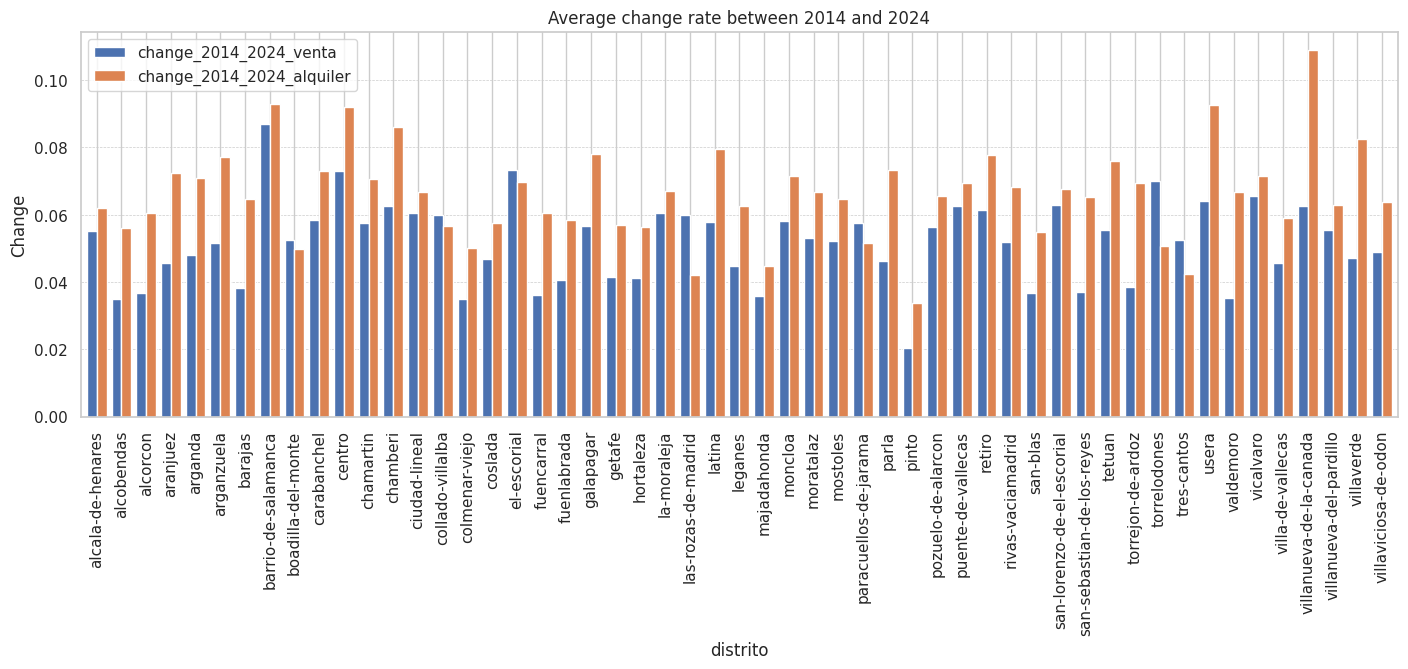

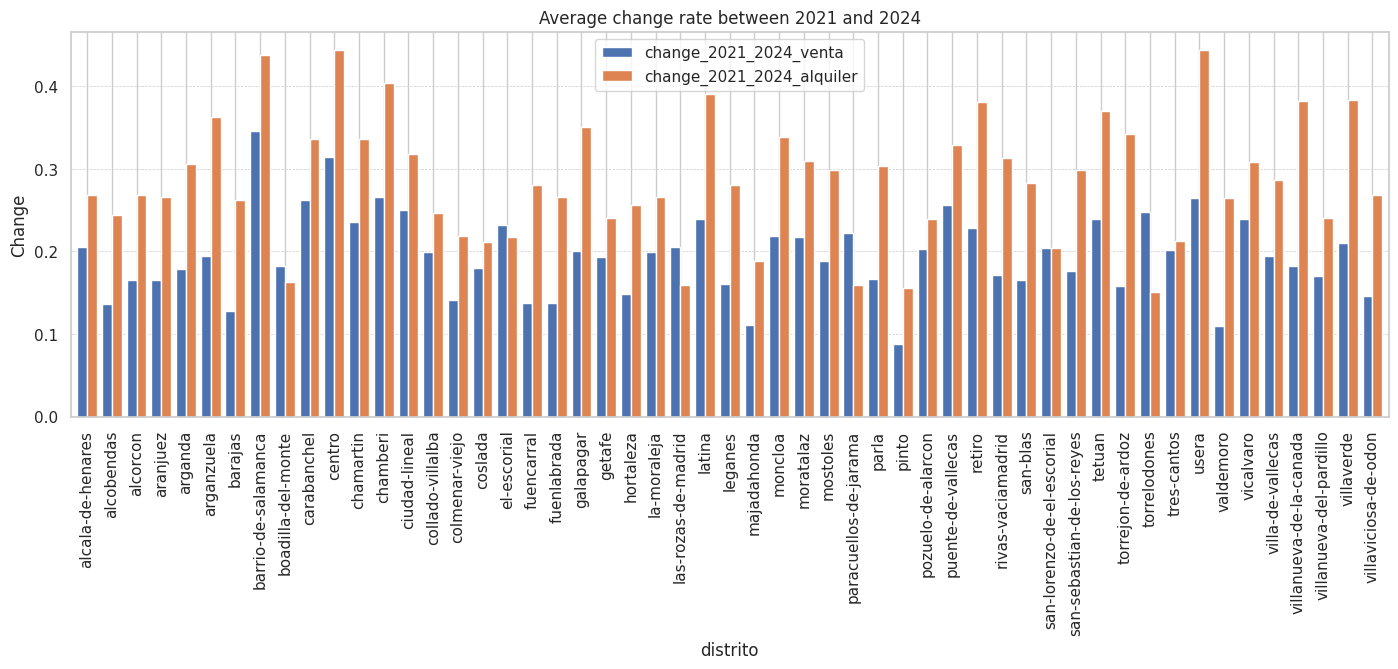

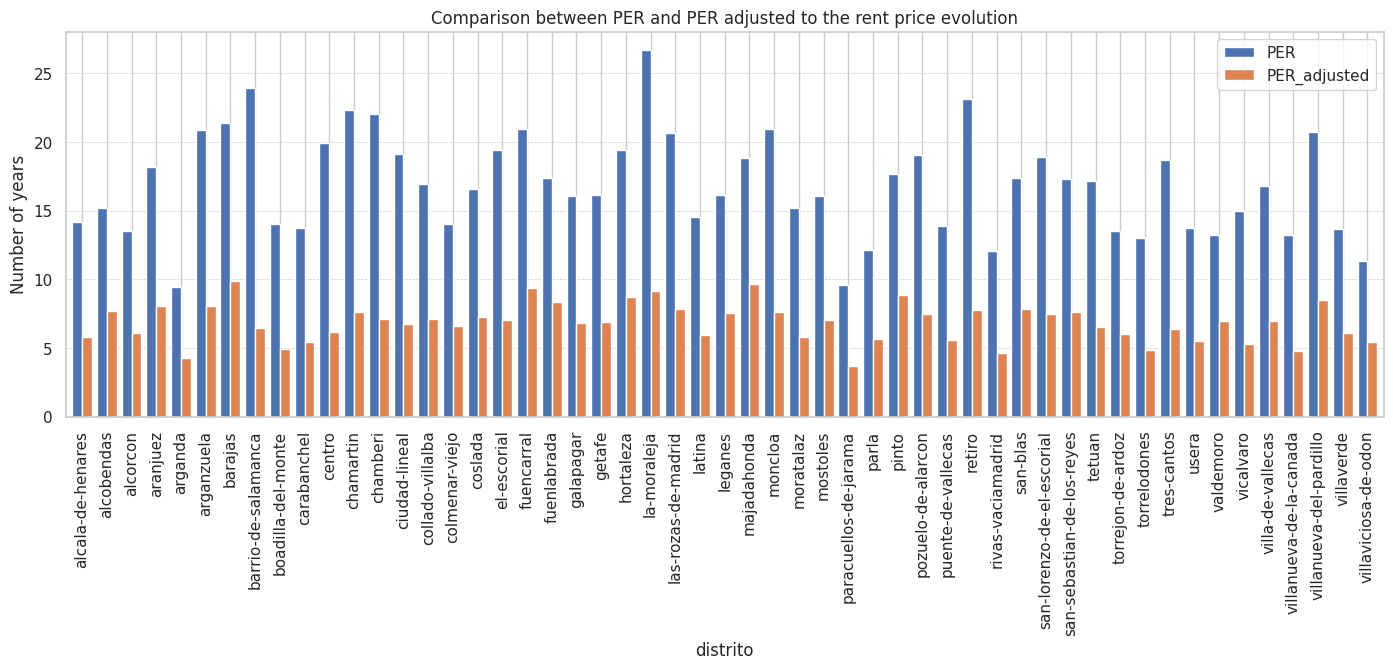

In [24]:
range_meters = {
    0: [0, 40],
    1: [40, 60], 
    2: [60, 90], 
    3: [90, 120], 
    4: [120, 1000]
}
def get_range_meters(meters):
    for r, _range in range_meters.items():
        if _range[0] <= meters < _range[1]:
            return r
df['range_meters'] = df['meters'].apply(get_range_meters)
df['€/meter'] = df['price'] / df['meters']

df_grouped = df.groupby(['distrito', 'range_meters', 'state']).agg({'€/meter': ['mean', 'size']}).reset_index()
df_grouped.columns = ['distrito', 'range_meters', 'state', '€/meter', 'size']

data = df_grouped.pivot_table(
    index=['distrito', 'range_meters'],
    columns='state',
    values=['€/meter', 'size']
).reset_index()
data.columns = ['distrito', 'range_meters', 'number alquiler', 'number venta', '€/meter alquiler', '€/meter venta']
data.fillna(0, inplace=True)

data['RB'] = data.apply(lambda x: ((x['€/meter alquiler'] * 12) / x['€/meter venta']) * 100 if x['€/meter venta'] > 0 else 0, axis=1)
data['PER'] = data.apply(lambda x: x['€/meter venta'] / (x['€/meter alquiler'] * 12) if x['€/meter alquiler'] > 0 else 0, axis=1)

evolution = pd.read_csv('evolution.csv')
data = pd.merge(data, evolution, on='distrito', how='inner')

range_meters_average = {
    0: 30,
    1: 50, 
    2: 80, 
    3: 100, 
    4: 120
}

data['meters_average'] = data['range_meters'].apply(lambda x: range_meters_average[x])
data = data.drop(columns=['range_meters'])
data['venta'] = data['meters_average'] * data['€/meter venta']
data['alquiler'] = data['meters_average'] * data['€/meter alquiler']

data['change_2014_2024_venta'] = data['change_2014_2024_venta'].apply(lambda x: x/100)
data['change_2014_2024_alquiler'] = data['change_2014_2024_alquiler'].apply(lambda x: x/100)

data['change_2021_2024_venta'] = data['change_2021_2024_venta'].apply(lambda x: x/100)
data['change_2021_2024_alquiler'] = data['change_2021_2024_alquiler'].apply(lambda x: x/100)

# Revalorization: How much does the flats cost when I finish paying for it? Just took into account the inflation
data['revalorization'] = data['venta'] * (data['change_2021_2024_venta'] + 1 )**data['PER']

# Calcular PER ajustado a la evolucion del alquiler
def calculate_per_adjusted(x):
    venta = x['venta']
    PER = x['PER']
    a0 = x['alquiler'] * 12
    g = x['change_2021_2024_venta']    
    n = math.log(1 + (g * venta / a0)) / math.log(1 + g) - 1 if a0 > 0 else 0 
    x['PER_adjusted'] = n
    return x

data = data.apply(calculate_per_adjusted, axis=1)

# Normalize the columns using Min-Max scaling
scaler = MinMaxScaler()
data['normalized_revalorization'] = scaler.fit_transform(data[['revalorization']])
data['normalized_RB'] = scaler.fit_transform(data[['RB']])
data['inverse_PER'] = data['PER'].apply(lambda x: 1 / x if x > 0 else 0)
data['normalized_PER'] = scaler.fit_transform(data[['inverse_PER']])


def plot_comparison_two_variables(data, variable1, variable2, title, y_name):
    aux = data[['distrito', variable1, variable2]]
    fig, ax = plt.subplots(figsize=(17, 5))
    aux.groupby('distrito').mean().plot(kind='bar', ax=ax, width=0.8)
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
    ax.set_ylabel(y_name)
    plt.title(title)
    plt.show()


# Plots
title = 'Average change rate between 2014 and 2024'
y_name = 'Change'
plot_comparison_two_variables(data, 'change_2014_2024_venta', 'change_2014_2024_alquiler', title, y_name)

title = 'Average change rate between 2021 and 2024'
y_name = 'Change'
plot_comparison_two_variables(data, 'change_2021_2024_venta', 'change_2021_2024_alquiler', title, y_name)

title = 'Comparison between PER and PER adjusted to the rent price evolution'
y_name = 'Number of years'
plot_comparison_two_variables(data, 'PER', 'PER_adjusted', title, y_name)

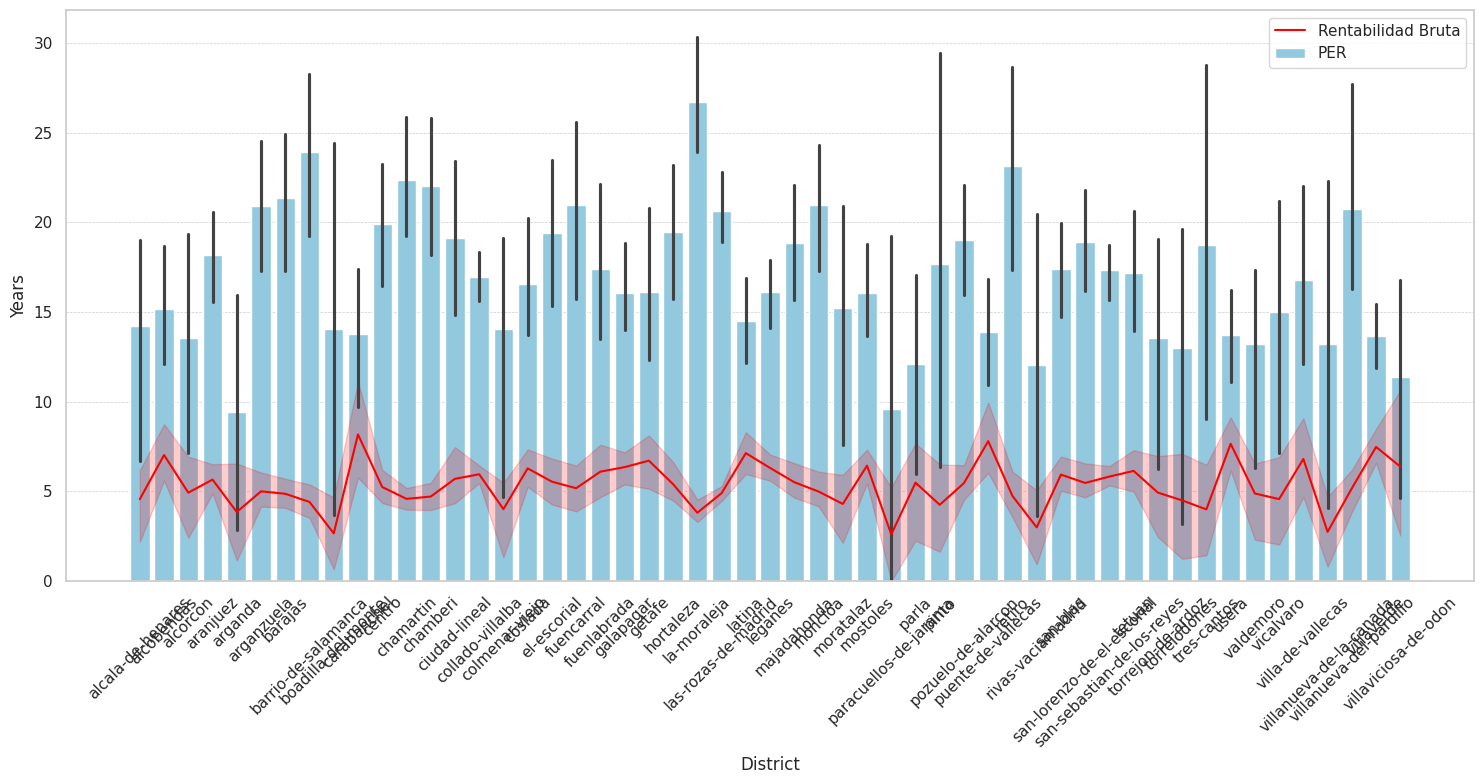

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data=data, x=data['distrito'], y='PER', ax=ax, color='skyblue', label='PER')
sns.lineplot(data=data, x=data['distrito'], y='RB', ax=ax, color='red', label='Rentabilidad Bruta')
ax.set_xlabel('District')
ax.set_ylabel('Years')
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
ax.tick_params(axis='x', rotation=45)
fig.tight_layout()
ax.legend()
plt.show()

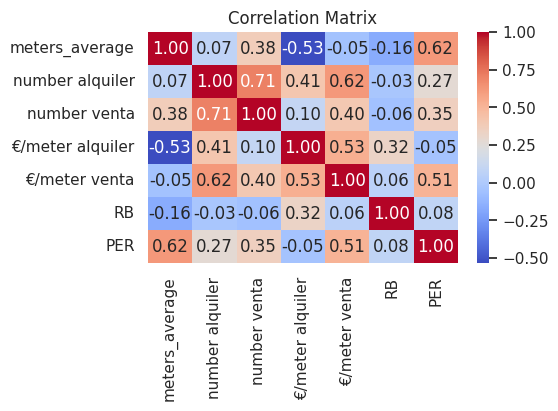

In [16]:
correlation_matrix = data[['meters_average', 'number alquiler', 'number venta', '€/meter alquiler', '€/meter venta', 'RB', 'PER']].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
data = data.set_index('distrito')
# Save the dataframe used to upload to gpt
data.to_csv('final_table.csv')